In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [2]:
exps  = ['exp1','exp2','exp3','exp4']
funcs = ['sphere','rastrigin','rosenbrock']

In [3]:
def plot_one(exp, func, ax):
    measure = 'fitness'
    nn_path = Path(f'../../data/cluster_results/{exp}/{func}')
    nn_path = list(nn_path.glob('freq1*nn_p3*nn_s3*'))[0]
    nonn_path = Path(f'../../data/cluster_results/{exp}/{func}')
    nonn_path = list(nonn_path.glob('freq1*nn_p3*nn_s2*'))[0]
    files = [o for o in nn_path.glob(f'*{measure}*') if 'NNdrop' not in o.name] +\
            [o for o in nonn_path.glob(f'*{measure}*') if 'noNN' in o.name] +\
            [Path(f'../../data/results/{exp}/{func}/best_known.csv')]
    #print(files)
    def read_values(x): return np.asarray(pd.read_csv(x)).mean(0)
    mean_values = [read_values(f) for f in files[:-1]]
    mean_values.append(np.asarray(pd.read_csv(files[-1]).fitness))

    for f,v in zip(files,mean_values):
        ax.plot(v, label=f.stem, linewidth=3, alpha=0.5)

    return ax

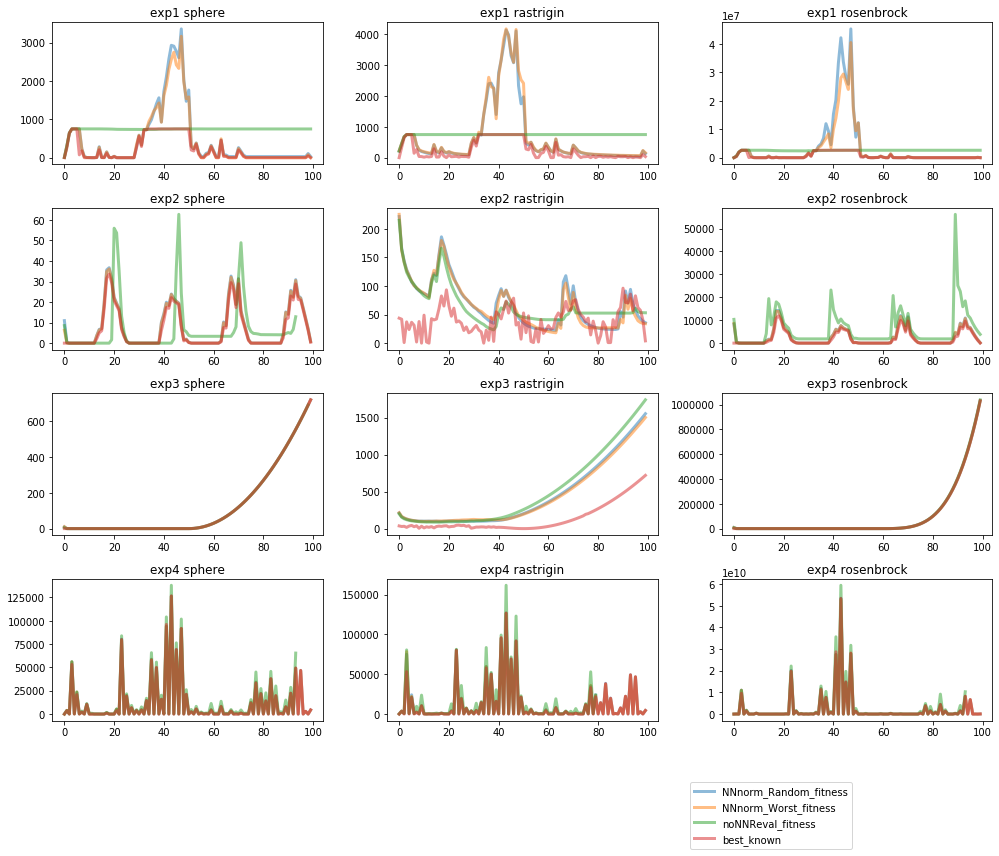

In [4]:
fig,axs = plt.subplots(4, 3, figsize=(14,12))

for ax_row,exp in zip(axs,exps):
    for ax,func in zip(ax_row,funcs):
        plot_one(exp,func,ax)
        ax.set_title(f'{exp} {func}')
        
ax.legend(loc='best', bbox_to_anchor=(0, -0.90, 0.5, 0.5))
plt.tight_layout()

In [5]:
axs[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1272f9e48>,
      dtype=object)

# ----

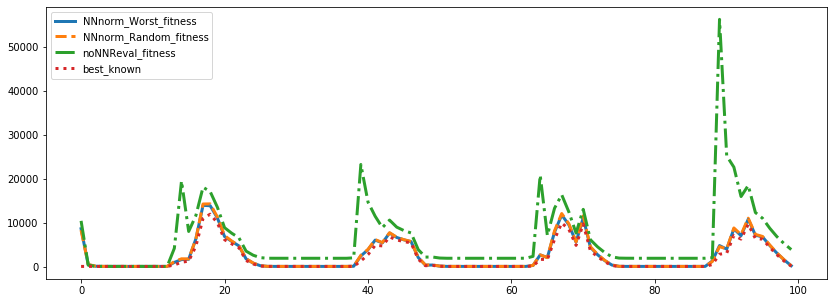

In [121]:
fig,ax = plt.subplots(figsize=(14,5))

for f,v,ls in zip(files,mean_values,['-','--','-.',':']):
    ax.plot(v, label=f.stem, linewidth=3, linestyle=ls)
    
ax.legend()